In [1]:
import os
import shutil
sorted(os.listdir())

['.DS_Store',
 '.ipynb_checkpoints',
 'CS6220 - Final Project - Face Mask Detection.pdf',
 'Dataset_853',
 'Face Mask Dataset',
 'MaskClassification.ipynb',
 'Not_Worn',
 'README.txt',
 'Untitled.ipynb',
 'WWMR-DB - Labels',
 'WWMR-DB - Part 1',
 'WWMR-DB - Part 2',
 'Worn_Correctly',
 'Worn_Incorrectly',
 'backup',
 'danya_headshot.jpg',
 'darknet',
 'darknet53.conv.74',
 'haarcascade_frontalface_default.xml',
 'haarcascade_profileface.xml',
 'obj',
 'profile.jpeg',
 'profile.png',
 'results']

In [9]:
from PIL import Image

In [32]:
#Create New Folders if they dont exist
if not os.path.isdir('Worn_Correctly'):
    os.makedirs("Worn_Correctly")
    
if not os.path.isdir('Not_Worn'):
    os.makedirs("Not_Worn")

In [33]:
#Make functions for copying images into a single folder
def copyImages(start, destination, category, png = True):
    for folder in os.listdir(start):
        subdir = os.path.join(start, folder)
        if os.path.isdir(subdir):

            subdir2 = os.path.join(subdir, category)
            if os.path.isdir(subdir2):

                for folder2 in os.listdir(subdir2):
                    subdir3 = os.path.join(subdir2, folder2)
                    if os.path.isdir(subdir3):
                        for file in os.listdir(subdir3):
                            image = os.path.join(subdir3, file)
                            
                            if png:
                                im1 = Image.open(image)
                                im1.save(os.path.join(destination, file.split(".")[0] +'.png'))
                            else:
                                shutil.copy2(image, destination)
                            
                            
def copyImages2(start, destination, category, png = True):
    for folder in os.listdir(start):
        subdir = os.path.join(start, folder)
        if os.path.isdir(subdir):

            subdir2 = os.path.join(subdir, category)
            if os.path.isdir(subdir2):

                for file in os.listdir(subdir2):
                    image = os.path.join(subdir2, file)
                    
                    if png:
                        im1 = Image.open(image)
                        im1.save(os.path.join(destination, file.split(".")[0] +'.png'))
                    else:
                        shutil.copy2(image, destination)

### Copy Images to Binary Classification Folders

In [34]:
start = os.getcwd() + "/WWMR-DB - Part 1"
destination = os.getcwd() + "/Worn_Correctly"
category = "Mask Or Respirator Correctly Worn"
copyImages(start, destination, category)
len(os.listdir(destination))

70

In [35]:
start = os.getcwd() + "/WWMR-DB - Part 2"
destination = os.getcwd() + "/Worn_Correctly"
category = "Mask Or Respirator Correctly Worn"
copyImages(start, destination, category)
len(os.listdir(destination))

152

In [36]:
start = os.getcwd() + "/WWMR-DB - Part 1"
destination = os.getcwd() + "/Not_Worn"
category = "Mask Or Respirator Not Worn"
copyImages2(start, destination, category)
print(len(os.listdir(destination)))

start = os.getcwd() + "/WWMR-DB - Part 2"
destination = os.getcwd() + "/Not_Worn"
category = "Mask Or Respirator Not Worn"
copyImages2(start, destination, category)
print(len(os.listdir(destination)))

46
113


In [37]:
start = os.getcwd() + "/WWMR-DB - Part 1"
destination = os.getcwd() + "/Worn_Incorrectly"
category = "Mask Or Respirator Hanging From An Ear"
copyImages(start, destination, category)
print(len(os.listdir(destination)))

start = os.getcwd() + "/WWMR-DB - Part 2"
destination = os.getcwd() + "/Worn_Incorrectly"
category = "Mask Or Respirator Hanging From An Ear"
copyImages(start, destination, category)
print(len(os.listdir(destination)))

114
241


In [38]:
start = os.getcwd() + "/WWMR-DB - Part 1"
destination = os.getcwd() + "/Worn_Incorrectly"
category = "Mask Or Respirator On The Forehead"
copyImages(start, destination, category)
print(len(os.listdir(destination)))

start = os.getcwd() + "/WWMR-DB - Part 2"
destination = os.getcwd() + "/Worn_Incorrectly"
category = "Mask Or Respirator On The Forehead"
copyImages(start, destination, category)
print(len(os.listdir(destination)))

311
393


In [39]:
start = os.getcwd() + "/WWMR-DB - Part 1"
destination = os.getcwd() + "/Worn_Incorrectly"
category = "Mask Or Respirator Under The Chin"
copyImages(start, destination, category)
print(len(os.listdir(destination)))

start = os.getcwd() + "/WWMR-DB - Part 2"
destination = os.getcwd() + "/Worn_Incorrectly"
category = "Mask Or Respirator Under The Chin"
copyImages(start, destination, category)
print(len(os.listdir(destination)))

463
545


In [40]:
start = os.getcwd() + "/WWMR-DB - Part 1"
destination = os.getcwd() + "/Worn_Incorrectly"
category = "Mask Or Respirator Under The Nose"
copyImages(start, destination, category)
print(len(os.listdir(destination)))

start = os.getcwd() + "/WWMR-DB - Part 2"
destination = os.getcwd() + "/Worn_Incorrectly"
category = "Mask Or Respirator Under The Nose"
copyImages(start, destination, category)
print(len(os.listdir(destination)))

615
697


### Read Images to create list 

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
folder = os.getcwd() + "/Worn_Correctly"
wc_list = [cv2.imread(os.path.join(folder, image)) for image in os.listdir(folder)]

In [11]:
folder = os.getcwd() + "/Not_Worn"
nw_list = [cv2.imread(os.path.join(folder, image)) for image in os.listdir(folder)]

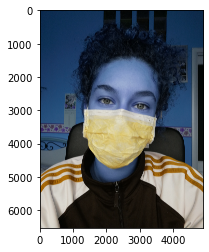

In [109]:
plt.imshow(wc_list[0])
plt.show()

### How many unique image dimensions are there?

In [91]:
df = pd.DataFrame([[image.shape[0],image.shape[1]] for image in wc_list])
df = pd.concat([df, pd.DataFrame([[image.shape[0],image.shape[1]] for image in nw_list])])
df.columns = ["R", "C"]
df

,R,C
0,6528,4896
1,5184,3880
2,3264,2448
3,5184,3880
4,5184,3880
...,...,...
108,6528,4896
109,3264,2448
110,4032,1860
111,3264,2448


In [105]:
df1 = df.groupby(['R','C']).size().reset_index().rename(columns={0:'count'})
df1.sort_values(by = ["count"], ascending=False).reset_index(drop = True)

,R,C,count
0,3264,2448,50
1,5184,3880,30
2,4608,3456,26
3,4624,3472,20
4,1280,720,19
5,3456,5184,18
6,6528,4896,12
7,3088,2320,10
8,1920,1080,9
9,4032,1860,9


## Face Detection

In [79]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

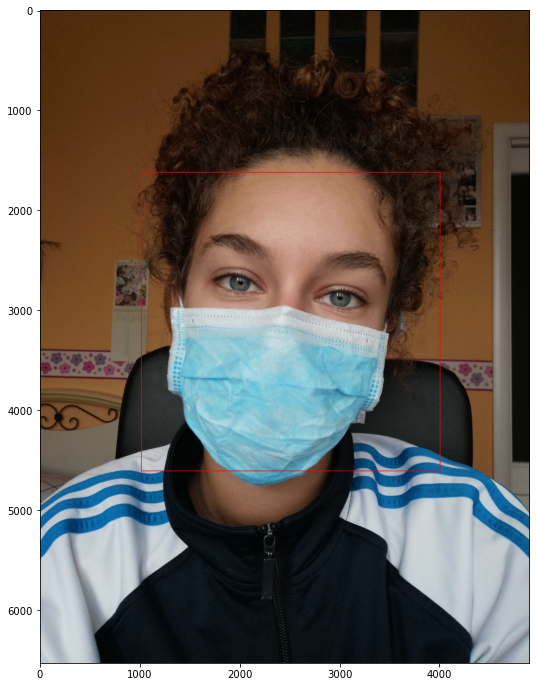

In [46]:
faces = haar_cascade_face.detectMultiScale(wc_list[0],scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(wc_list[0], cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(255, 0, 0),5)
plt.figure(figsize=(12,12))
plt.imshow(out_img)
plt.show()

In [47]:
faces

array([[1012, 1622, 2985, 2985]], dtype=int32)

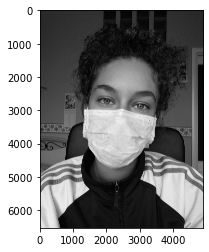

In [33]:
img = cv2.cvtColor(wc_list[0], cv2.COLOR_RGB2GRAY) #colored output image
plt.imshow(img, cmap='gray')
plt.show()

In [29]:
img.shape

(6528, 4896)

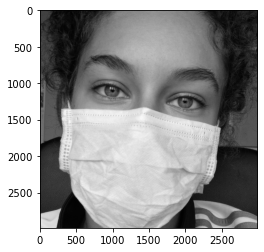

In [34]:
img2 = img[y:y+h, x:x+w]
plt.imshow(img2, cmap='gray')
plt.show()

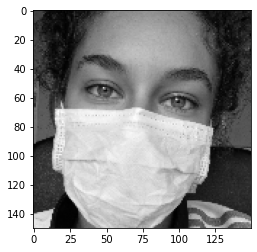

In [35]:
img3 = cv2.resize(img2, (150, 150))
plt.imshow(img3, cmap='gray')
plt.show()

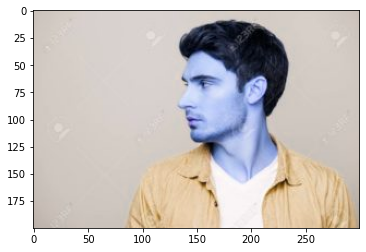

In [61]:
img = cv2.imread("profile.jpeg")
plt.imshow(img)
plt.show()

In [ ]:
haar_cascade_profile = cv2.CascadeClassifier('haarcascade_profileface.xml')

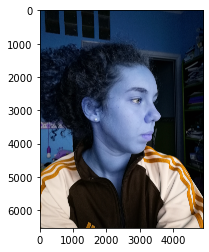

In [75]:
plt.imshow(nw_list[2])
plt.show()

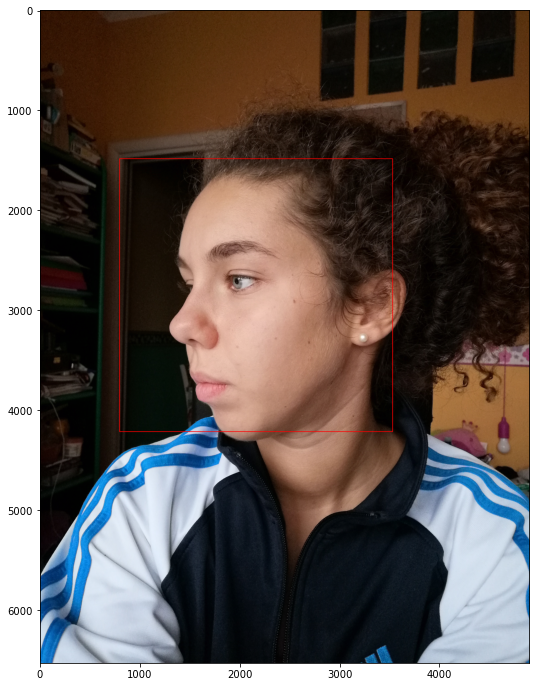

In [72]:
profile = cv2.flip(nw_list[2], 1)
faces = haar_cascade_profile.detectMultiScale(profile,scaleFactor=1.1, minNeighbors=4)

out_img = cv2.cvtColor(profile, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(255, 0, 0),5)
plt.figure(figsize=(12,12))
plt.imshow(out_img)
plt.show()

In [83]:
def cropFace(cascade, image):
    
    for (x,y,w,h) in cascade:

        img = image[y:y+h, x:x+w, :]
        img = cv2.resize(img, (150, 150))
    return img


def isolateFace(image, plot = False):
    
    image_flipped = cv2.flip(image, 1)
    
    face = haar_cascade_face.detectMultiScale(image, scaleFactor=1.1, minNeighbors=4)
    
    if len(face) == 1:
            
        return cropFace(face, image)
    
    else:
        
        profile = haar_cascade_profile.detectMultiScale(image, scaleFactor=1.1, minNeighbors=4)
        image_flipped = cv2.flip(image, 1)
        profile_flipped = haar_cascade_profile.detectMultiScale(image_flipped, scaleFactor=1.1, minNeighbors=4)
    
        if len(profile) == 1:
            
            return cropFace(profile, image)
        
        elif len(profile_flipped) == 1:
            
            return cropFace(profile_flipped, image_flipped)

In [86]:
a = isolateFace(nw_list[2])

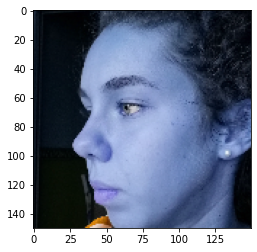

In [87]:
plt.imshow(a, cmap='gray')
plt.show()